## In this notebook we are going to perform classification by using :

***random forest classifier***

***naive bayes classifier***

***comparing logistic regression,random forest classifier and decision tree classifier***

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data from world bank data excel file.

In [162]:
df= pd.read_excel('World_Bank_Projects_downloaded_6_13_2022.xls')

## Data preprocessing

In [163]:
df

,"World Bank Projects, data as of 06/13/2022 16:15:46 EST",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,P000019,Africa,Africa,Dropped,NaN,UEMOA Regional Financial Sector Project,NaN,NaN,NaN,http://projects.worldbank.org/P000019/null?lan...,...,0,NaN,Specific Investment Loan,C,NaN,NaN,NaN,NaN,NaN,NaN
21541,P000017,Africa,Africa,Closed,Bank Approved,Engineering and Technical Assistance Project,NaN,NaN,NaN,http://projects.worldbank.org/P000017/engineer...,...,0,NaN,Technical Assistance Loan,C,NaN,Power,NaN,NaN,Legal institutions for a market economy,Regional integration
21542,P000010,Africa,Africa,Closed,NaN,Regional Development Project (03),NaN,NaN,NaN,http://projects.worldbank.org/P000010/null?lan...,...,0,NaN,Financial Intermediary Loan,B,NaN,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,P000003,Africa,Africa,Closed,Bank Approved,REIMP(CEN.ENV.INFO),NaN,NaN,NaN,http://projects.worldbank.org/P000003/reimpcen...,...,4100000,NaN,Specific Investment Loan,C,NaN,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


### changing the columns of our dataframe

In [164]:
df.columns = df.iloc[0]

In [165]:
df

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,P000019,Africa,Africa,Dropped,NaN,UEMOA Regional Financial Sector Project,NaN,NaN,NaN,http://projects.worldbank.org/P000019/null?lan...,...,0,NaN,Specific Investment Loan,C,NaN,NaN,NaN,NaN,NaN,NaN
21541,P000017,Africa,Africa,Closed,Bank Approved,Engineering and Technical Assistance Project,NaN,NaN,NaN,http://projects.worldbank.org/P000017/engineer...,...,0,NaN,Technical Assistance Loan,C,NaN,Power,NaN,NaN,Legal institutions for a market economy,Regional integration
21542,P000010,Africa,Africa,Closed,NaN,Regional Development Project (03),NaN,NaN,NaN,http://projects.worldbank.org/P000010/null?lan...,...,0,NaN,Financial Intermediary Loan,B,NaN,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,P000003,Africa,Africa,Closed,Bank Approved,REIMP(CEN.ENV.INFO),NaN,NaN,NaN,http://projects.worldbank.org/P000003/reimpcen...,...,4100000,NaN,Specific Investment Loan,C,NaN,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


In [166]:
df.drop(df.index[[0,1]],inplace =True)

In [167]:
df

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
5,P179254,Western and Central Africa,Republic of Cameroon,Pipeline,NaN,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,NaN,NaN,http://projects.worldbank.org/P179254/null?lan...,...,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,P179238,Western and Central Africa,Republic of Chad,Pipeline,NaN,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",NaN,NaN,http://projects.worldbank.org/P179238/null?lan...,...,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,P000019,Africa,Africa,Dropped,NaN,UEMOA Regional Financial Sector Project,NaN,NaN,NaN,http://projects.worldbank.org/P000019/null?lan...,...,0,NaN,Specific Investment Loan,C,NaN,NaN,NaN,NaN,NaN,NaN
21541,P000017,Africa,Africa,Closed,Bank Approved,Engineering and Technical Assistance Project,NaN,NaN,NaN,http://projects.worldbank.org/P000017/engineer...,...,0,NaN,Technical Assistance Loan,C,NaN,Power,NaN,NaN,Legal institutions for a market economy,Regional integration
21542,P000010,Africa,Africa,Closed,NaN,Regional Development Project (03),NaN,NaN,NaN,http://projects.worldbank.org/P000010/null?lan...,...,0,NaN,Financial Intermediary Loan,B,NaN,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,P000003,Africa,Africa,Closed,Bank Approved,REIMP(CEN.ENV.INFO),NaN,NaN,NaN,http://projects.worldbank.org/P000003/reimpcen...,...,4100000,NaN,Specific Investment Loan,C,NaN,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


### retrieving the column names from our dataframe

In [168]:
df.columns

Index(['Project ID', 'Region', 'Country', 'Project Status',
       'Last Stage Reached Name', 'Project Name',
       'Project Development Objective ', 'Implementing Agency',
       'Consultant Services Required', 'Project URL', 'Board Approval Date',
       'Project Closing Date', 'Financing Type', 'Current Project Cost',
       'IBRD Commitment ', 'IDA Commitment', 'Total IDA and IBRD Commitment',
       'Grant Amount', 'Borrower', 'Lending Instrument',
       'Environmental Assessment Category', 'Environmental and Social Risk',
       'Sector 1', 'Sector 2', 'Sector 3', 'Theme 1', 'Theme 2'],
      dtype='object', name=0)

## checking the states of Project status

In [169]:
df['Project Status'].unique()

array(['Active', 'Dropped', 'Pipeline', nan, 'Closed'], dtype=object)

In [170]:
df['Project Status'].value_counts()

Closed      15783
Active       3088
Dropped      1725
Pipeline      943
Name: Project Status, dtype: int64

### let's drop the project url column as it is not necessary 

In [171]:
df.drop('Project URL',axis=1,inplace=True)

### let's also drop project_id column as we already have an index

In [172]:
df.drop('Project ID',axis=1,inplace=True)

### checking for null values

In [173]:
df.isnull().sum().sort_values()

0
IBRD Commitment                          1
Grant Amount                             1
Total IDA and IBRD Commitment            1
IDA Commitment                           1
Project Name                             1
Region                                   2
Country                                  2
Project Status                           4
Current Project Cost                   148
Lending Instrument                     249
Sector 1                              1916
Board Approval Date                   2757
Project Closing Date                  4959
Last Stage Reached Name               6347
Environmental Assessment Category     8461
Financing Type                        8506
Theme 1                               9288
Project Development Objective         9963
Sector 2                             10367
Theme 2                              11648
Sector 3                             13978
Implementing Agency                  14894
Borrower                             15131
Consultan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'IBRD Commitment '),
  Text(1, 0, 'Grant Amount'),
  Text(2, 0, 'Total IDA and IBRD Commitment'),
  Text(3, 0, 'IDA Commitment'),
  Text(4, 0, 'Project Name'),
  Text(5, 0, 'Region'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Project Status'),
  Text(8, 0, 'Current Project Cost'),
  Text(9, 0, 'Lending Instrument'),
  Text(10, 0, 'Sector 1'),
  Text(11, 0, 'Board Approval Date'),
  Text(12, 0, 'Project Closing Date'),
  Text(13, 0, 'Last Stage Reached Name'),
  Text(14, 0, 'Environmental Assessment Category'),
  Text(15, 0, 'Financing Type'),
  Text(16, 0, 'Theme 1'),
  Text(17, 0, 'Project Development Objective '),
  Text(18, 0, 'Sector 2'),
  Text(19, 0, 'Theme 2'),
  Text(20, 0, 'Sector 3'),
  Text(21, 0, 'Implementing Agency'),
  Text(22, 0, 'Borrower'),
  Text(23, 0, 'Consultant Services Required'),
  Text(24, 0, 'Environmental and Social Risk')])

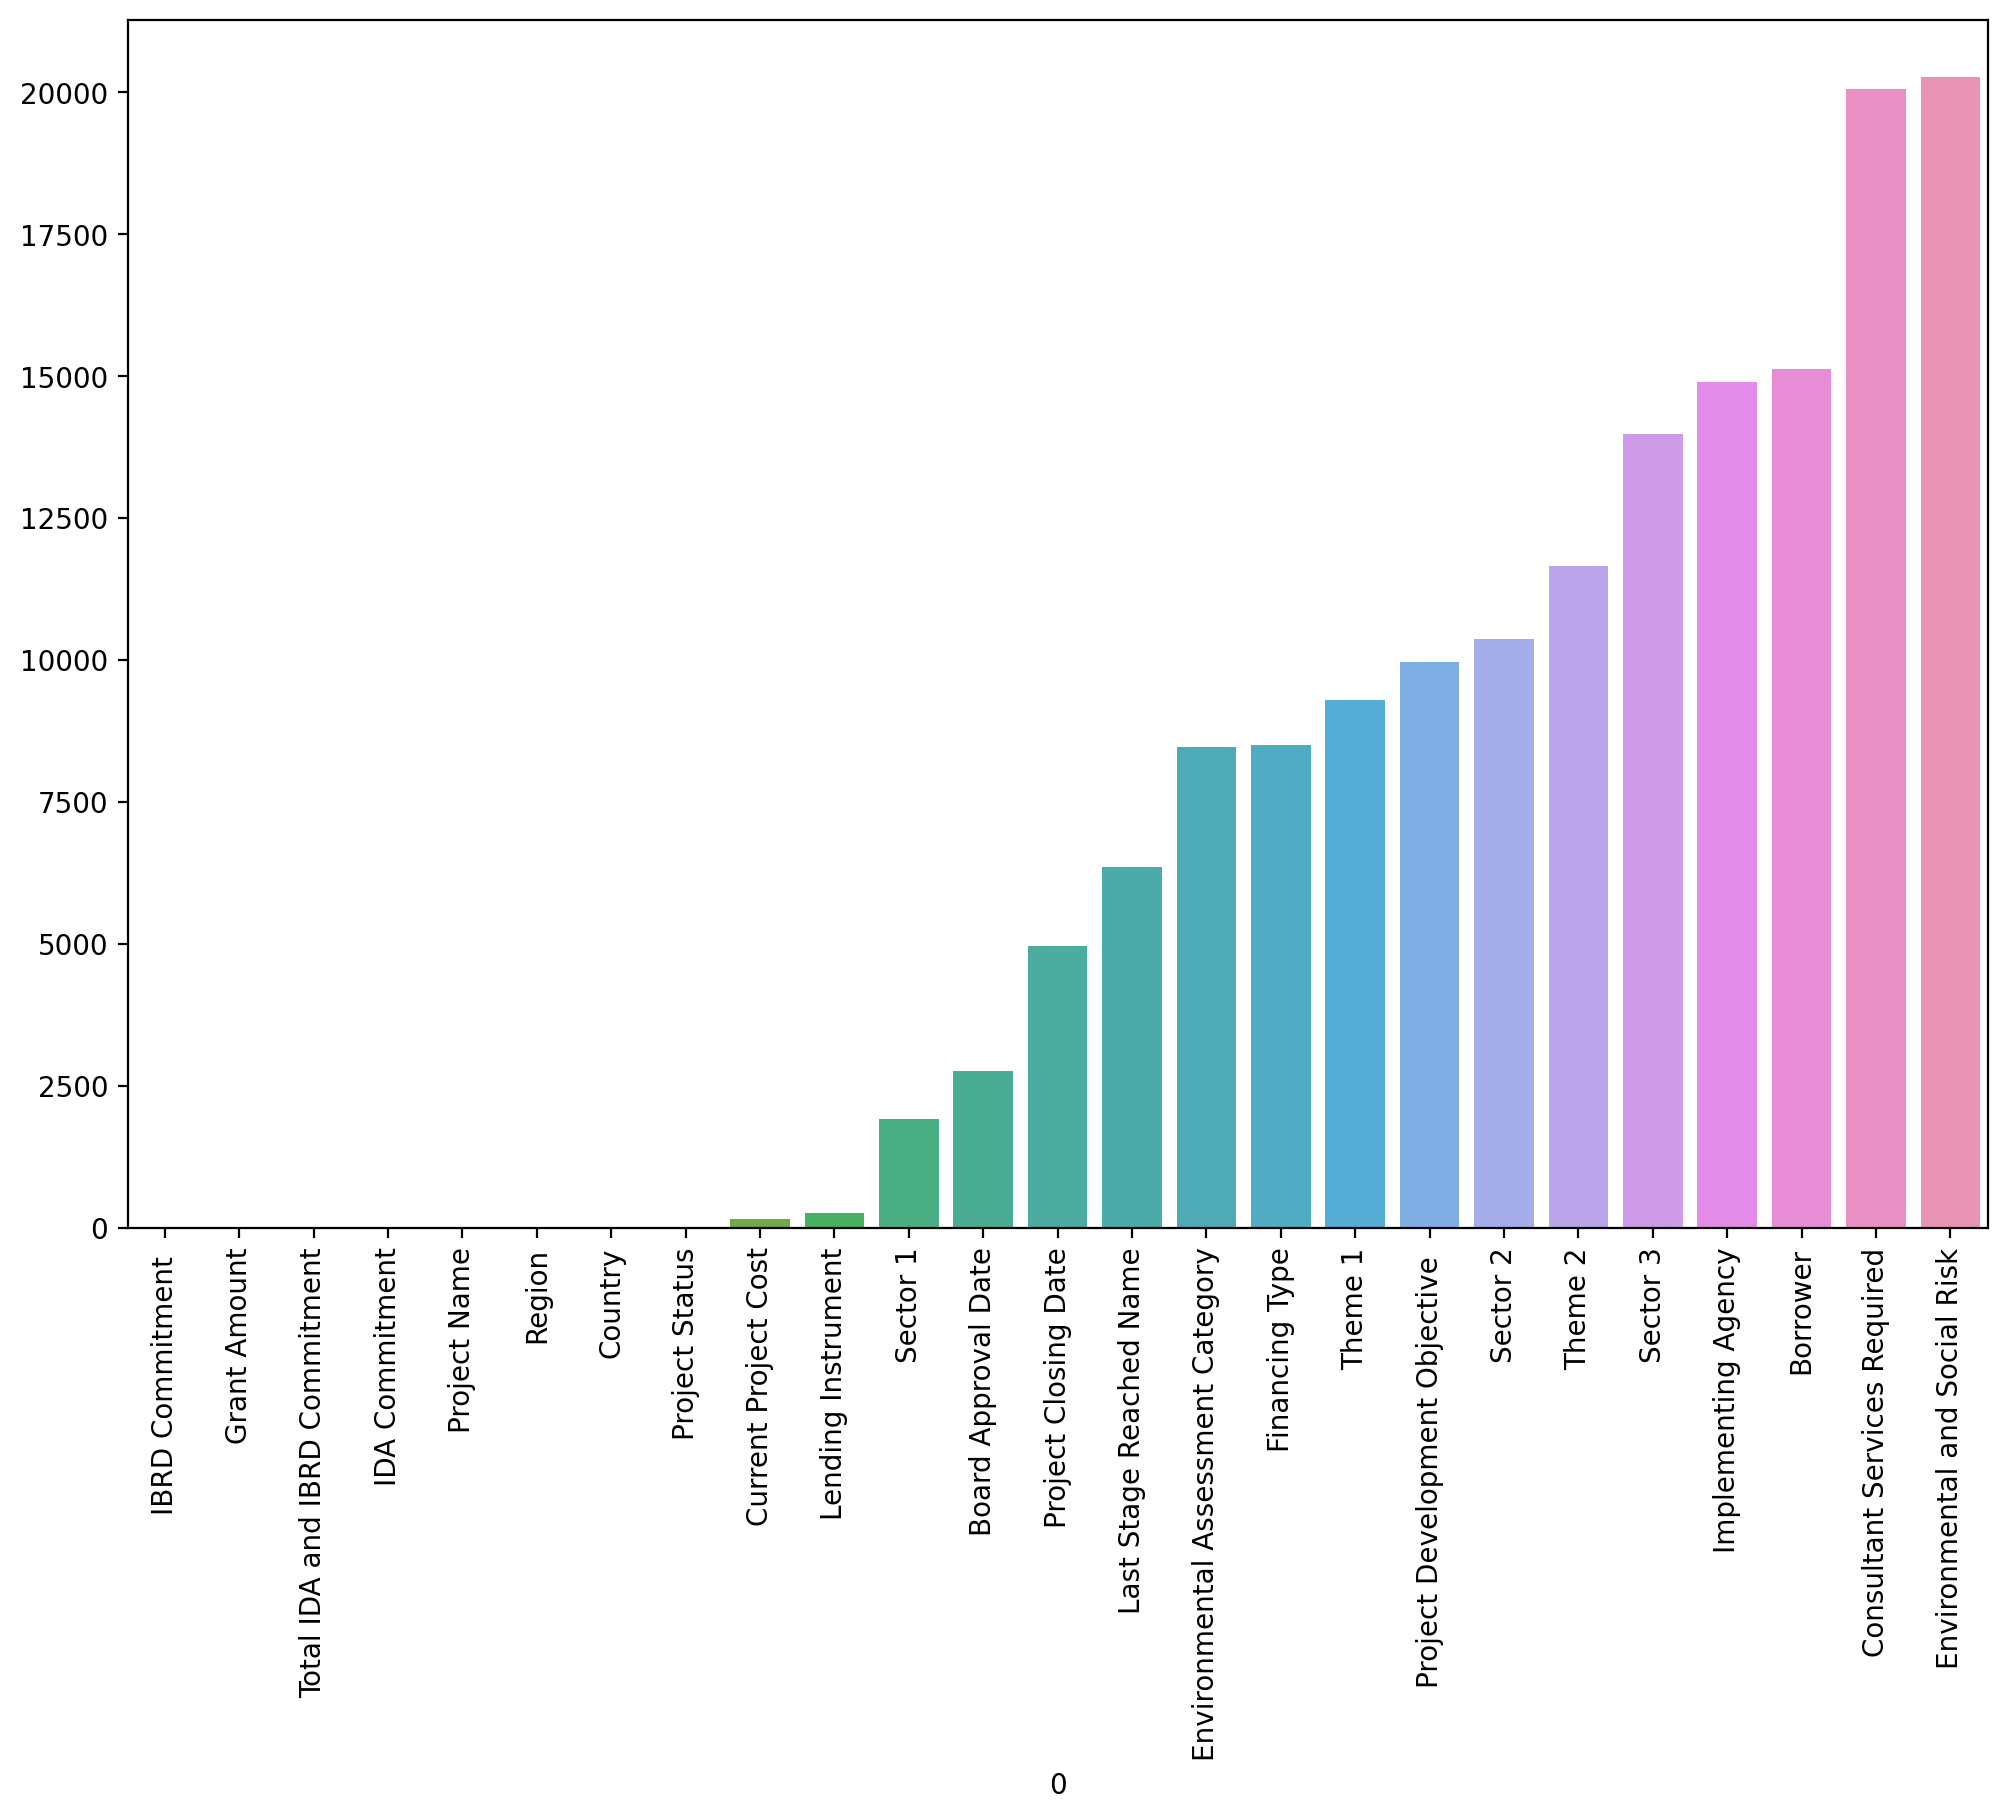

In [174]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(x=df.isnull().sum().sort_values().index , y= df.isnull().sum().sort_values())
plt.xticks(rotation=90)

### Consultant Services Required and Environmental and Social Risk columns have too many null values so it's not necessary for us to include them in our model

Active and Closed projects show current commitments. Proposed (pipeline) and dropped projects show the forecast amount. The commitment amount for projects in the pipeline is indicative and may be modified during the project preparation.



In [175]:
df.drop(['Consultant Services Required','Environmental and Social Risk'],axis =1, inplace=True)

In [176]:
# replacing nan values in the project status to "not specified"
df['Project Status'].replace(np.nan,'not specified',inplace=True)

In [177]:
df['Project Status'].unique()

array(['Active', 'Dropped', 'Pipeline', 'not specified', 'Closed'],
      dtype=object)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21543 entries, 2 to 21544
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Region                             21541 non-null  object
 1   Country                            21541 non-null  object
 2   Project Status                     21543 non-null  object
 3   Last Stage Reached Name            15196 non-null  object
 4   Project Name                       21542 non-null  object
 5   Project Development Objective      11580 non-null  object
 6   Implementing Agency                6649 non-null   object
 7   Board Approval Date                18786 non-null  object
 8   Project Closing Date               16584 non-null  object
 9   Financing Type                     13037 non-null  object
 10  Current Project Cost               21395 non-null  object
 11  IBRD Commitment                    21542 non-null  object
 12  IDA 

All our columns are object type

In [179]:
df['Grant Amount'].fillna('0',inplace=True)
df['Total IDA and IBRD Commitment'].fillna('0',inplace=True)
df['IBRD Commitment '].fillna('0',inplace=True)
df['Current Project Cost'].fillna('0',inplace=True)
df['IDA Commitment'].fillna('0',inplace=True)

In [180]:
df.isnull().sum()

0
Region                                   2
Country                                  2
Project Status                           0
Last Stage Reached Name               6347
Project Name                             1
Project Development Objective         9963
Implementing Agency                  14894
Board Approval Date                   2757
Project Closing Date                  4959
Financing Type                        8506
Current Project Cost                     0
IBRD Commitment                          0
IDA Commitment                           0
Total IDA and IBRD Commitment            0
Grant Amount                             0
Borrower                             15131
Lending Instrument                     249
Environmental Assessment Category     8461
Sector 1                              1916
Sector 2                             10367
Sector 3                             13978
Theme 1                               9288
Theme 2                              11648
dtype: in

In [181]:
df[['Grant Amount','Total IDA and IBRD Commitment','IBRD Commitment ','Current Project Cost','IDA Commitment']] = df[['Grant Amount','Total IDA and IBRD Commitment','IBRD Commitment ','Current Project Cost','IDA Commitment']].astype(int)

In [182]:
df.replace(np.nan,'Information unavailable',inplace=True)

In [183]:
df 

,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Board Approval Date,Project Closing Date,Financing Type,...,Total IDA and IBRD Commitment,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,2017-07-05T00:00:00Z,9/30/2023 12:00:00 AM,IDA,...,120000000,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,Information unavailable,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,Information unavailable
3,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",2017-04-27T00:00:00Z,Information unavailable,Information unavailable,...,35200000,0,Ministry of Finance,Investment Project Financing,B,Public Administration - Transportation,Rural and Inter-Urban Roads,Information unavailable,Information unavailable,Information unavailable
4,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,Information unavailable,Information unavailable,Information unavailable,...,0,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,Information unavailable,Information unavailable,Information unavailable,"Public expenditure, financial management and p...",Decentralization
5,Western and Central Africa,Republic of Cameroon,Pipeline,Information unavailable,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,Information unavailable,Information unavailable,Information unavailable,Information unavailable,...,100000000,0,Information unavailable,Investment Project Financing,Information unavailable,Information unavailable,Information unavailable,Information unavailable,Information unavailable,Information unavailable
6,Western and Central Africa,Republic of Chad,Pipeline,Information unavailable,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",Information unavailable,Information unavailable,Information unavailable,Information unavailable,...,150000000,0,Information unavailable,Investment Project Financing,Information unavailable,Information unavailable,Information unavailable,Information unavailable,Information unavailable,Information unavailable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,Africa,Africa,Dropped,Information unavailable,UEMOA Regional Financial Sector Project,Information unavailable,Information unavailable,Information unavailable,Information unavailable,Information unavailable,...,10000000,0,Information unavailable,Specific Investment Loan,C,Information unavailable,Information unavailable,Information unavailable,Information unavailable,Information unavailable
21541,Africa,Africa,Closed,Bank Approved,Engineering and Technical Assistance Project,Information unavailable,Information unavailable,1992-05-19T00:00:00Z,12/31/1999 12:00:00 AM,IDA,...,5500000,0,Information unavailable,Technical Assistance Loan,C,Power,Information unavailable,Information unavailable,Legal institutions for a market economy,Regional integration
21542,Africa,Africa,Closed,Information unavailable,Regional Development Project (03),Information unavailable,Information unavailable,1990-02-01T00:00:00Z,12/31/1997 12:00:00 AM,Information unavailable,...,55000000,0,Information unavailable,Financial Intermediary Loan,B,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportatio

### let's now take useful columns and dummy encode them

In [184]:
data=  pd.get_dummies(df[['Region', 'Country','Financing Type','Borrower', 'Lending Instrument','Sector 1', 'Sector 2', 'Sector 3']])

In [185]:
data 

,Region_Africa,Region_Africa East,Region_Africa West,Region_East Asia and Pacific,Region_Eastern and Southern Africa,Region_Europe and Central Asia,Region_Information unavailable,Region_Latin America and Caribbean,Region_Middle East and North Africa,Region_Other,...,Sector 3_Sub-National Government,Sector 3_Telecommunications,Sector 3_Tertiary Education,Sector 3_Tourism,Sector 3_Trade,Sector 3_Urban Transport,Sector 3_Vocational training,Sector 3_Waste Management,Sector 3_Water Supply,Sector 3_Workforce Development and Vocational Education
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21541,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21542,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21543,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
df2= df[['Grant Amount','Total IDA and IBRD Commitment','IBRD Commitment ','Current Project Cost','IDA Commitment']] = df[['Grant Amount','Total IDA and IBRD Commitment','IBRD Commitment ','Current Project Cost','IDA Commitment']]
df2

,Grant Amount,Total IDA and IBRD Commitment,IBRD Commitment,Current Project Cost,IDA Commitment
2,0,120000000,0,120000000,120000000
3,0,35200000,0,39140000,35200000
4,340000,0,0,340000,0
5,0,100000000,0,100000000,100000000
6,0,150000000,0,150000000,150000000
...,...,...,...,...,...
21540,0,10000000,0,10000000,10000000
21541,0,5500000,0,6100000,5500000
21542,0,55000000,15000000,55000000,40000000
21543,4100000,0,0,19700000,0


In [187]:
main_df = pd.concat([data,df2],axis=1)
main_df

,Region_Africa,Region_Africa East,Region_Africa West,Region_East Asia and Pacific,Region_Eastern and Southern Africa,Region_Europe and Central Asia,Region_Information unavailable,Region_Latin America and Caribbean,Region_Middle East and North Africa,Region_Other,...,Sector 3_Urban Transport,Sector 3_Vocational training,Sector 3_Waste Management,Sector 3_Water Supply,Sector 3_Workforce Development and Vocational Education,Grant Amount,Total IDA and IBRD Commitment,IBRD Commitment,Current Project Cost,IDA Commitment
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,120000000,0,120000000,120000000
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,35200000,0,39140000,35200000
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,340000,0,0,340000,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,100000000,0,100000000,100000000
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,150000000,0,150000000,150000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10000000,0,10000000,10000000
21541,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5500000,0,6100000,5500000
21542,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,55000000,15000000,55000000,40000000
21543,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4100000,0,0,19700000,0


In [188]:
X = main_df
y = df['Project Status']

---------


# Random Forest multi class classification


-----------

In [189]:
from sklearn.datasets import make_classification
print(X.shape, y.shape)

(21543, 2793) (21543,)


In [190]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [191]:
model = RandomForestClassifier(n_estimators = 100)

In [192]:
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [193]:
print('Accuracy: %.2f ' % (np.mean(n_scores)))

Accuracy: 0.88 


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [195]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [196]:
y_pred = model.predict(X_test)

In [197]:
y_pred

array(['Closed', 'Closed', 'Closed', ..., 'Closed', 'Active', 'Closed'],
      dtype=object)

In [198]:
print("ACCURACY OF THE MODEL IS: ",accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL IS:  0.8797771932539069


In [199]:
model.feature_importances_

array([1.13303471e-03, 7.73231998e-05, 0.00000000e+00, ...,
       2.03256549e-02, 5.36217658e-02, 2.86751661e-02])

In [200]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

       Active       0.73      0.79      0.76       937
       Closed       0.92      0.94      0.93      4719
      Dropped       0.89      0.52      0.66       528
     Pipeline       0.72      0.81      0.76       278
not specified       0.00      0.00      0.00         1

     accuracy                           0.88      6463
    macro avg       0.65      0.61      0.62      6463
 weighted avg       0.88      0.88      0.88      6463



/Users/isita/Downloads/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/isita/Downloads/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/isita/Downloads/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Probability  whether a project will be “closed” or “canceled/distressed"

In [201]:
pd.Series(y_pred).value_counts()

Closed      4823
Active      1018
Pipeline     314
Dropped      308
dtype: int64

In [202]:
(332+4820)/6463

0.797153024911032

In [203]:
model.classes_

array(['Active', 'Closed', 'Dropped', 'Pipeline', 'not specified'],
      dtype=object)

## our model predicts that the probability for a project to be dropped is 79.7%

----------

# using Naive bayes classifier - binary classification

-----------

In [204]:
df2= pd.read_excel('World_Bank_Projects_downloaded_6_13_2022.xls')
df2.columns = df2.iloc[0]
df2.drop(df2.index[[0,1]],inplace =True)
df2.drop('Project URL',axis=1,inplace=True)
df2.drop('Project ID',axis=1,inplace=True)
df2.drop(['Consultant Services Required','Environmental and Social Risk'],axis =1, inplace=True)
df2['Project Status'].replace(np.nan,'not specified',inplace=True)
#mapping closed and dropped status to 1 and the rest to 0, to perform binary classification
df2['Project Status']=df2['Project Status'].map({'Active': 0, 'Closed':1, 'Dropped':1, 'Pipeline':0, 'not specified':0})
df2['Grant Amount'].fillna('0',inplace=True)
df2['Total IDA and IBRD Commitment'].fillna('0',inplace=True)
df2['IBRD Commitment '].fillna('0',inplace=True)
df2['Current Project Cost'].fillna('0',inplace=True)
df2['IDA Commitment'].fillna('0',inplace=True)
df2[['Grant Amount','Total IDA and IBRD Commitment','IBRD Commitment ','Current Project Cost','IDA Commitment']] = df[['Grant Amount','Total IDA and IBRD Commitment','IBRD Commitment ','Current Project Cost','IDA Commitment']].astype(int)
df2.replace(np.nan,'Information unavailable',inplace=True)
data=  pd.get_dummies(df2[['Region', 'Country','Financing Type','Borrower', 'Lending Instrument','Sector 1', 'Sector 2', 'Sector 3']])
sub_data= df2[['Grant Amount','Total IDA and IBRD Commitment','IBRD Commitment ','Current Project Cost','IDA Commitment']] 
main_df = pd.concat([sub_data,data],axis=1)
main_df2.head()

,Region_Africa,Region_Africa East,Region_Africa West,Region_East Asia and Pacific,Region_Eastern and Southern Africa,Region_Europe and Central Asia,Region_Information unavailable,Region_Latin America and Caribbean,Region_Middle East and North Africa,Region_Other,...,Sector 3_Urban Transport,Sector 3_Vocational training,Sector 3_Waste Management,Sector 3_Water Supply,Sector 3_Workforce Development and Vocational Education,Grant Amount,Total IDA and IBRD Commitment,IBRD Commitment,Current Project Cost,IDA Commitment
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,120000000,0,120000000,120000000
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,35200000,0,39140000,35200000
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,340000,0,0,340000,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,100000000,0,100000000,100000000
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,150000000,0,150000000,150000000


In [205]:
X = main_df2
y = df2['Project Status']

In [206]:
y.head()

2    0
3    0
4    1
5    0
6    0
Name: Project Status, dtype: int64

In [207]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

***scaling data with standard scaler***


This Scaler removes the mean(mean=0) and scales each feature/variable to unit variance.

In [208]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [209]:
# modeling a gaussian naive bayes classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [210]:
# predicting the X_test data
y_pred = gnb.predict(X_test)

y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [211]:
print('accuracy score of the naive bayes model : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

accuracy score of the naive bayes model : 0.523


In [212]:
# predicting the X_train data
y_pred_2 = gnb.predict(X_train)

y_pred_2
print('accuracy score of the naive bayes model on train data : {0:0.3f}'. format(accuracy_score(y_train, y_pred_2)))

accuracy score of the naive bayes model on train data : 0.572


Note : As the accuracy for train data and test data doesn't have much difference, we can say that there's no much overfitting

In [213]:
y_test.value_counts()

1    5271
0    1192
Name: Project Status, dtype: int64

In [214]:
(5271/6463)*100

81.55655268451184

It is predicted that 5271 projects out of 6463 are dropped/cancelled. Naive bayes predicts that 81.5% of the projects have the possibility of getting dropped.

checking the probability of row 1 project being accepted of dropped.

In [215]:
gnb.predict_proba([X_train[0]])

array([[1., 0.]])

In [216]:
gnb.classes_

array([0, 1])

In [217]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.97      0.43      1192
           1       0.98      0.42      0.59      5271

    accuracy                           0.52      6463
   macro avg       0.63      0.69      0.51      6463
weighted avg       0.85      0.52      0.56      6463



## Result : Naive bayes algorithm performs poorly comapared to random forest algorithm.
we can further tune the hyperparameters of random forest to get better accuracy.

# comparing logistic regression,random forest classifier and decision tree classifier

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#fit decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
#fit random forest classifier
forest = RandomForestClassifier(n_jobs=1,)
forest.fit(X_train, y_train)
#fit logistic regression model
log_reg = LogisticRegression(n_jobs=-1,max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [229]:
models= [('log_reg', log_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import accuracy_score, classification_report
for i, model in models:    
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print('accuracy of', accuracy)
    print(classification_report(y_test, predictions))

accuracy of 0.8947857032337924
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1192
           1       0.94      0.93      0.93      5271

    accuracy                           0.89      6463
   macro avg       0.82      0.84      0.83      6463
weighted avg       0.90      0.89      0.90      6463

accuracy of 0.9133529320748878
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1192
           1       0.95      0.94      0.95      5271

    accuracy                           0.91      6463
   macro avg       0.85      0.87      0.86      6463
weighted avg       0.92      0.91      0.91      6463

accuracy of 0.896797153024911
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1192
           1       0.94      0.93      0.94      5271

    accuracy                           0.90      6463
   macro avg       0.83      0.84   

### By the above accuracy scores and metrics, we can finally say that random forest is the best model. it gives an accuracy of 92% approximately.

In [231]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=1),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [233]:
grid_search_forest.best_params_

{'bootstrap': True, 'max_depth': None, 'max_features': 10, 'n_estimators': 25}